<a href="https://colab.research.google.com/github/kevinwanyama/sentiment_analysis__project/blob/main/Sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install wordcloud
!pip install gensim
!pip install nltk
!pip install tensorflow

In [ ]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
# Tensorflow
import tensorflow as tf
from tensorflow.keras.preprocessing.text import one_hot,Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical

In [ ]:
pilani_df = pd.read_csv('Sentiment_Dataset.csv',encoding='ISO-8859-1')

In [ ]:
pilani_df

,SentimentText,Sentiment
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1
2,user I'd be afraid to short AMZN - they are lo...,1
3,MNTA Over 12.00,1
4,OI Over 21.37,1
...,...,...
5786,Industry body CII said #discoms are likely to ...,0
5787,"#Gold prices slip below Rs 46,000 as #investor...",0
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1
5789,"#Sharemarket LIVE: Sensex off dayâs high, up...",1


In [ ]:
pilani_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5791 entries, 0 to 5790
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   SentimentText  5791 non-null   object
 1   Sentiment      5791 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 90.6+ KB


In [ ]:
pilani_df.isnull().sum()

SentimentText    0
Sentiment        0
dtype: int64

In [ ]:
pilani_df['Sentiment'].nunique()

2

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


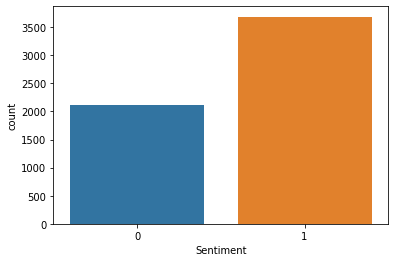

In [ ]:
sns.countplot(pilani_df['Sentiment'])

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
def remove_punc(message):
    punc_removed = [char for char in message if char not in string.punctuation]
    punc_removed_join = ''.join(punc_removed)

    return punc_removed_join

In [ ]:
pilani_df['SentimentText without Punctuation'] = pilani_df['SentimentText'].apply(remove_punc)

In [ ]:
pilani_df

,SentimentText,Sentiment,SentimentText without Punctuation
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,user AAP MOVIE 55 return for the FEAGEED indic...
2,user I'd be afraid to short AMZN - they are lo...,1,user Id be afraid to short AMZN they are look...
3,MNTA Over 12.00,1,MNTA Over 1200
4,OI Over 21.37,1,OI Over 2137
...,...,...,...
5786,Industry body CII said #discoms are likely to ...,0,Industry body CII said discoms are likely to s...
5787,"#Gold prices slip below Rs 46,000 as #investor...",0,Gold prices slip below Rs 46000 as investors b...
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1,Workers at Bajaj Auto have agreed to a 10 wage...
5789,"#Sharemarket LIVE: Sensex off dayâs high, up...",1,Sharemarket LIVE Sensex off dayâs high up 60...


In [ ]:
#remove stopwords
nltk.download("stopwords")
stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [ ]:
# Remove stopwords and remove short words that are less than 2 characters.
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if len(token) >= 3 and token not in stop_words:
            result.append(token)
            
    return result

In [ ]:
pilani_df['SentimentText Without Punc & Stopwords']=pilani_df['SentimentText without Punctuation'].apply(preprocess)

In [ ]:
pilani_df

,SentimentText,Sentiment,SentimentText without Punctuation,SentimentText Without Punc & Stopwords
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,"[kickers, watchlist, xide, tit, soq, pnk, cpw,..."
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,user AAP MOVIE 55 return for the FEAGEED indic...,"[user, aap, movie, return, feageed, indicator,..."
2,user I'd be afraid to short AMZN - they are lo...,1,user Id be afraid to short AMZN they are look...,"[user, afraid, short, amzn, looking, like, nea..."
3,MNTA Over 12.00,1,MNTA Over 1200,[mnta]
4,OI Over 21.37,1,OI Over 2137,[]
...,...,...,...,...
5786,Industry body CII said #discoms are likely to ...,0,Industry body CII said discoms are likely to s...,"[industry, body, cii, said, discoms, likely, s..."
5787,"#Gold prices slip below Rs 46,000 as #investor...",0,Gold prices slip below Rs 46000 as investors b...,"[gold, prices, slip, investors, book, profits,..."
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1,Workers at Bajaj Auto have agreed to a 10 wage...,"[workers, bajaj, auto, agreed, wage, cut, peri..."
5789,"#Sharemarket LIVE: Sensex off dayâs high, up...",1,Sharemarket LIVE Sensex off dayâs high up 60...,"[sharemarket, live, sensex, dayâ, high, points..."


In [ ]:
#joining cleaned text into a string to create a word cloud.
pilani_df['Joined_clean_SentimentText'] = pilani_df['SentimentText Without Punc & Stopwords'].apply(lambda x: " ".join(x))

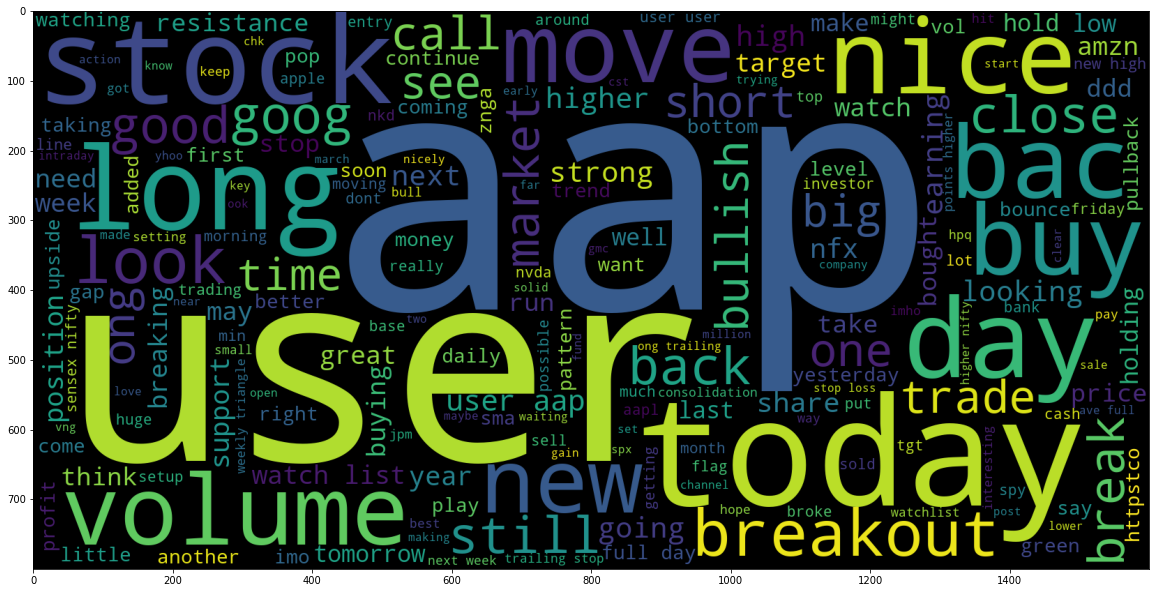

In [ ]:
#word cloud for positive sentiments.
plt.figure(figsize = (20, 20)) 
wc=WordCloud( width=1600,height=800).generate(" ".join(pilani_df[pilani_df['Sentiment']==1]['Joined_clean_SentimentText']))
plt.imshow(wc)

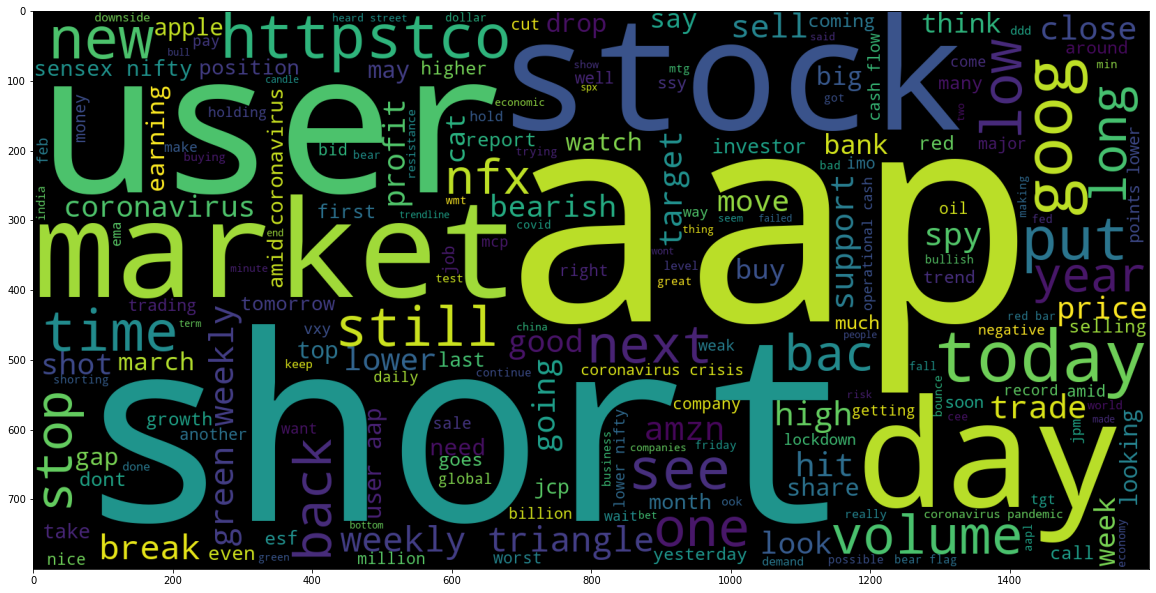

In [ ]:
#word cloud for negative sentiments.
plt.figure(figsize = (20, 20)) 
wcn=WordCloud(width=1600,height=800).generate(" ".join(pilani_df[pilani_df['Sentiment']==0]['Joined_clean_SentimentText']))
plt.imshow(wcn)

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
#counting number of words in each line of text.
tweets_length = [ len(nltk.word_tokenize(x)) for x in pilani_df['Joined_clean_SentimentText'] ]
tweets_length

[14,
 9,
 8,
 1,
 0,
 1,
 10,
 13,
 8,
 5,
 10,
 18,
 9,
 9,
 11,
 5,
 14,
 10,
 13,
 4,
 6,
 6,
 2,
 5,
 3,
 10,
 3,
 3,
 10,
 6,
 11,
 12,
 9,
 3,
 11,
 11,
 4,
 9,
 13,
 11,
 11,
 8,
 10,
 10,
 4,
 10,
 8,
 7,
 7,
 9,
 10,
 10,
 8,
 2,
 14,
 13,
 9,
 8,
 1,
 14,
 8,
 12,
 6,
 14,
 6,
 6,
 7,
 6,
 6,
 10,
 10,
 4,
 11,
 13,
 17,
 6,
 9,
 8,
 2,
 11,
 5,
 4,
 10,
 11,
 16,
 4,
 11,
 5,
 6,
 3,
 1,
 6,
 9,
 4,
 7,
 6,
 7,
 10,
 1,
 3,
 9,
 4,
 16,
 8,
 11,
 11,
 18,
 7,
 9,
 13,
 12,
 10,
 4,
 4,
 11,
 11,
 10,
 6,
 10,
 5,
 5,
 8,
 9,
 15,
 3,
 5,
 9,
 19,
 13,
 11,
 3,
 1,
 1,
 2,
 7,
 13,
 12,
 9,
 9,
 11,
 10,
 11,
 15,
 8,
 10,
 10,
 12,
 12,
 6,
 10,
 13,
 4,
 12,
 10,
 16,
 14,
 9,
 12,
 5,
 5,
 3,
 8,
 2,
 4,
 10,
 7,
 6,
 12,
 6,
 16,
 9,
 6,
 5,
 11,
 10,
 12,
 9,
 2,
 11,
 9,
 11,
 12,
 8,
 10,
 8,
 3,
 6,
 6,
 9,
 9,
 4,
 6,
 5,
 4,
 5,
 11,
 12,
 8,
 9,
 14,
 9,
 7,
 10,
 12,
 8,
 7,
 7,
 3,
 11,
 11,
 6,
 9,
 11,
 16,
 10,
 8,
 12,
 8,
 12,
 11,
 4,
 4,
 3,
 11,
 2,
 9,
 

<function matplotlib.pyplot.show>

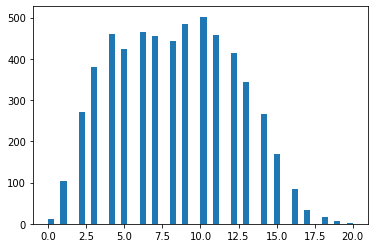

In [ ]:
#distribution of tweets
plt.hist(tweets_length,bins=50)
plt.show

In [ ]:
#tokenizing the dataset
list_of_words = []
for i in pilani_df['SentimentText Without Punc & Stopwords']:
  for j in i:
    list_of_words.append(j)


In [ ]:
list_of_words

['kickers',
 'watchlist',
 'xide',
 'tit',
 'soq',
 'pnk',
 'cpw',
 'bpz',
 'trade',
 'method',
 'method',
 'see',
 'prev',
 'posts',
 'user',
 'aap',
 'movie',
 'return',
 'feageed',
 'indicator',
 'trades',
 'year',
 'awesome',
 'user',
 'afraid',
 'short',
 'amzn',
 'looking',
 'like',
 'nearmonopoly',
 'ebooks',
 'mnta',
 'pgnx',
 'aap',
 'user',
 'current',
 'downtrend',
 'break',
 'otherwise',
 'shortterm',
 'correction',
 'medterm',
 'downtrend',
 'mondays',
 'relative',
 'weakness',
 'nyx',
 'win',
 'tie',
 'tap',
 'ice',
 'int',
 'bmc',
 'aon',
 'chk',
 'biib',
 'goog',
 'ower',
 'trend',
 'line',
 'channel',
 'test',
 'volume',
 'support',
 'aap',
 'watch',
 'tomorrow',
 'ong',
 'entry',
 'assuming',
 'fcx',
 'opens',
 'tomorrow',
 'trigger',
 'buy',
 'still',
 'much',
 'like',
 'setup',
 'really',
 'worries',
 'everyone',
 'expects',
 'market',
 'rally',
 'nowusually',
 'exact',
 'opposite',
 'happens',
 'every',
 'time',
 'shall',
 'see',
 'soon',
 'bac',
 'spx',
 'jpm',
 '

In [ ]:
#finding number of unique words
total_words = len(list(set(list_of_words)))
total_words

9290

In [ ]:
#spliting model into train set and test set
X=pilani_df['SentimentText Without Punc & Stopwords']
y=pilani_df['Sentiment']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2)

In [ ]:
X_test.shape

(1159,)

In [ ]:
X_train.shape

(4632,)

In [ ]:
X_train

5729    [sensex, opens, points, lower, nifty, coronavi...
2039                                    [breakout, watch]
3699    [szym, decent, setup, multiple, timeframes, vo...
2342    [dvax, options, trade, heplisav, fda, approval...
5290    [coronavirus, reminds, investors, stocks, risk...
                              ...                        
2202              [aap, next, big, little, thing, iwatch]
1454    [josb, hitting, risk, profile, quant, macro, v...
2861                [trade, idea, buy, goog, target, cut]
3180    [ngf, natural, gas, weekly, supplies, lower, p...
3428              [user, waiting, numbers, insights, app]
Name: SentimentText Without Punc & Stopwords, Length: 4632, dtype: object

In [ ]:
#tokenizing with a tokenizer.
tokenizer = Tokenizer(num_words=total_words)
tokenizer.fit_on_texts(X_train)

#tokenizing training data
train_sequences = tokenizer.texts_to_sequences(X_train)

#tokenizing testing data
test_sequences = tokenizer.texts_to_sequences(X_test)

In [ ]:
train_sequences

[[32, 294, 50, 53, 37, 23, 3333, 102, 68, 32, 37, 418],
 [44, 13],
 [1733, 710, 136, 1017, 1382, 6, 78],
 [589, 295, 30, 3334, 2286, 1172, 871],
 [23, 1173, 140, 31, 273, 1018, 551, 2287, 3335, 3336, 3337],
 [1174, 1175, 359, 3338, 505, 201, 24, 872, 1176, 2],
 [57, 1383, 3339, 3340, 2288, 873, 3341, 647, 1384, 3342, 3343, 3344],
 [1019, 3345, 338, 381, 202, 48, 310, 3346],
 [1, 85, 227, 3347, 1385],
 [2, 263, 18, 45, 178, 1, 18, 874, 2289],
 [1734, 111, 711, 382, 3348, 419, 111],
 [12, 296, 33],
 [2, 3349, 552, 450, 42, 228],
 [83, 1020, 450],
 [1177],
 [1735, 213, 311, 125, 3350, 506, 383, 875, 151, 3351],
 [2290, 876, 102, 68, 712, 713, 1178, 3352, 3353],
 [1386, 12, 1179, 1180, 2291, 1736, 229],
 [8, 1021, 297, 1737, 4, 1022, 298],
 [1738, 1181, 3354],
 [1023,
  254,
  714,
  1387,
  648,
  1024,
  648,
  3355,
  157,
  230,
  15,
  91,
  50,
  877,
  145,
  1739],
 [12, 158],
 [472, 62, 3, 553, 38, 649, 3356, 112, 785, 97],
 [32, 37, 1388, 360, 384, 59, 786, 30, 51, 3357, 3358],
 

In [ ]:
test_sequences

[[17, 85, 1824, 133, 39, 1342, 2314, 41, 3],
 [45, 126, 30],
 [7978, 6104, 4, 7130, 1176, 1630, 1161, 5134, 68, 8060],
 [478, 609, 609, 58, 187, 3, 114, 98, 210, 453, 95, 847, 503],
 [1, 196, 325, 527, 105, 671, 164, 125, 3, 2162, 46, 301, 4],
 [888, 141, 1532, 187, 12, 147],
 [8, 120, 316, 44, 60, 101],
 [4610, 3, 338, 14],
 [2, 45, 2332, 857, 6016, 118, 35, 1682, 15, 24],
 [4771, 728, 44, 11, 47, 18, 336, 6],
 [655, 3, 650, 66],
 [172, 166, 308, 976, 808, 4165, 1006],
 [3175, 642, 460, 881, 197, 1846, 2104],
 [218, 2837, 4, 5496, 133, 16, 537, 14],
 [117, 216, 135, 60, 135, 647],
 [38, 33, 20, 4, 44, 840, 442, 1941],
 [17, 723, 122, 175, 1245, 271],
 [2, 1, 165, 778, 2250, 419, 104, 2250, 567, 85, 6, 63, 89],
 [2, 165, 57, 551, 2514, 3560, 751, 1146, 1945],
 [2, 2, 1, 2258, 1426, 44, 243, 2258, 1694, 5995, 544],
 [6824, 5239, 65, 353, 18, 567, 961, 386, 95, 103, 16, 142, 1642],
 [160, 454, 4225, 31, 66],
 [209, 3508, 359, 270, 2112, 58, 273, 60, 60, 273, 852],
 [2203, 119, 305, 316, 

In [ ]:
#padding on the training and testing sequences
padded_train= pad_sequences(train_sequences,maxlen=15,padding='post',truncating='post')
padded_test=pad_sequences(test_sequences,maxlen=15,truncating='post')

In [ ]:
#changing data to 2D representation.
y_train_cat = to_categorical(y_train, 2)
y_test_cat = to_categorical(y_test, 2)

In [ ]:
y_test_cat.shape

(1159, 2)

In [ ]:
y_train_cat.shape

(4632, 2)

In [ ]:
y_test_cat

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [ ]:
#creating a training model
model = Sequential()

model.add(Embedding(total_words,output_dim = 512))
model.add(LSTM(256))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(2,activation = 'softmax'))
model.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics = ['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 512)         4756480   
_________________________________________________________________
lstm (LSTM)                  (None, 256)               787456    
_________________________________________________________________
dense (Dense)                (None, 128)               32896     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 258       
Total params: 5,577,090
Trainable params: 5,577,090
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#training the model
model.fit(padded_train,y_train_cat,batch_size=32,validation_split=0.2,epochs=2)

Epoch 1/2
116/116 [==============================] - 26s 201ms/step - loss: 0.6475 - acc: 0.6325 - val_loss: 0.5164 - val_acc: 0.7379
Epoch 2/2
116/116 [==============================] - 22s 194ms/step - loss: 0.3267 - acc: 0.8744 - val_loss: 0.5987 - val_acc: 0.7584


In [ ]:
#making predictions
pred = model.predict(padded_test)

In [ ]:
prediction=[]
for i in pred:
  prediction.append(np.argmax(i))

In [ ]:
prediction

[1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,


In [ ]:
#original values
original = []
for i in y_test_cat:
  original.append(np.argmax(i))

In [ ]:
#accuracy score of the model.
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(original,prediction)
accuracy

0.719585849870578

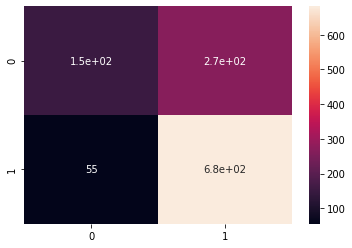

In [ ]:
#ploting the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(original,prediction)
sns.heatmap(cm,annot=True)

In [ ]:
my_tweet = 'This is a country bad country,i regrate being a citizen of kenya '
print(preprocess(my_tweet))
tw_sequences = tokenizer.texts_to_sequences(my_tweet)
kev = pred[tw_sequences]
if kev > 0.5:
    print('Positive sentiment')
else: 
    print('Negative sentiment')


['country', 'bad', 'country', 'regrate', 'citizen', 'kenya']
Negative sentiment


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  """
